----

# **Digit Recognizer Using CNN**

<h1 style="font-family: 'poppins'; font-weight: bold; color: Blue;">Author: Vaibhav Kumar</h1>

----

-------

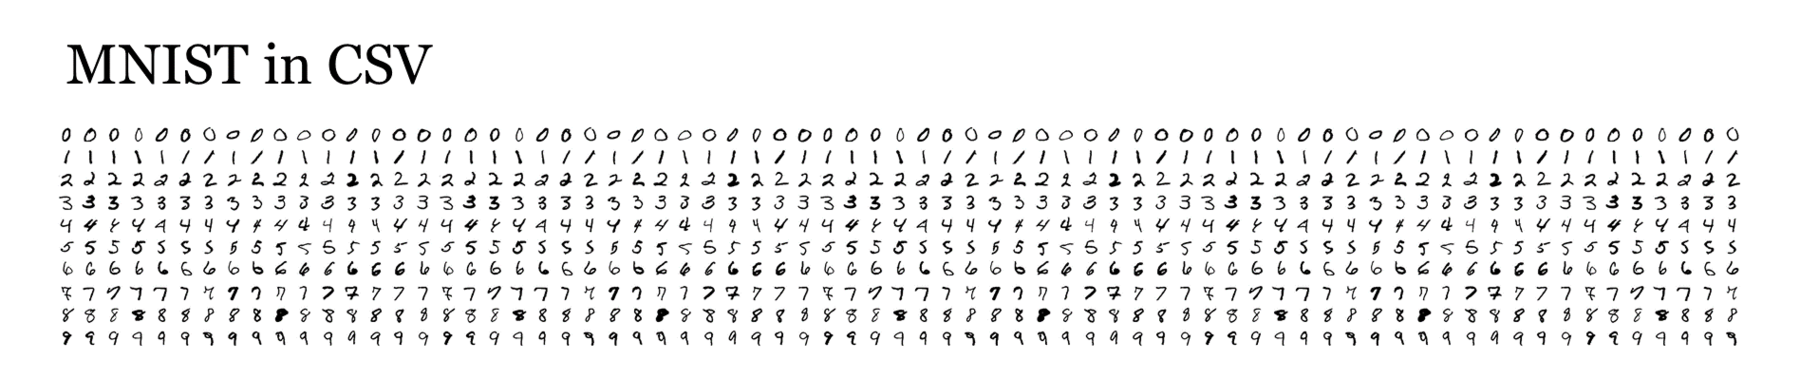

----

-----



<div style="text-align: center; 
            background-color: #ffcc00; /* Bright Yellow */
            padding: 20px; 
            border-radius: 30px; 
            position: relative; 
            overflow: hidden;">
    <h2 style="color: #003366; /* Dark Blue */
               font-weight: bold; 
               margin: 0;">Objective</h2>
    <div style="position: absolute; 
                width: 100%; 
                height: 100%; 
                top: -10%; 
                left: -10%; 
                background-color: #ffcc00; 
                clip-path: polygon(0 0, 0 100%, 100% 100%, 100% 0, 50% 50%); 
                z-index: -1;"></div>
</div>

The goal of this project is to build a **digit recognition model** using the **MNIST dataset**, classifying 28x28 grayscale images of handwritten digits (0-9) using a **Convolutional Neural Network (CNN)**. Additionally, a **Streamlit web app** will be developed to allow users to upload images and receive digit predictions.


<div style="text-align: center; 
            background-color: #ffcc00; /* Bright Yellow */
            padding: 20px; 
            border-radius: 30px; 
            position: relative; 
            overflow: hidden;">
    <h2 style="color: #003366; /* Dark Blue */
               font-weight: bold; 
               margin: 0;">Project Life Cycle</h2>
    <div style="position: absolute; 
                width: 100%; 
                height: 100%; 
                top: -10%; 
                left: -10%; 
                background-color: #ffcc00; 
                clip-path: polygon(0 0, 0 100%, 100% 100%, 100% 0, 50% 50%); 
                z-index: -1;"></div>
</div>




1. **Load the Dataset**:
   - Load and visualize the MNIST dataset.
   - Split the data into training and test sets.

2. **Normalize the Data**:
   - Normalize pixel values (0-255 to 0-1) and reshape to fit the CNN input (28x28x1).

3. **Build the CNN Model**:
   - Create a CNN with layers like Conv2D, MaxPooling, and Dense, using ReLU and softmax activation functions.

4. **Train the Model**:
   - Compile and train the model using the Adam optimizer and sparse categorical cross-entropy loss.

5. **Predict and Visualize Results**:
   - Use the trained model to predict digits on test images.
   - Visualize actual vs. predicted labels and evaluate performance.

6. **Save the Model**:
   - Save the trained model as `mnist_cnn_model.h5` for future use.

7. **Create a Streamlit Web App**:
   - Build a web app to upload images, preprocess them, and predict digits using the saved model.

-----

<div style="text-align: center; 
            background-color: #ffcc00; /* Bright Yellow */
            padding: 20px; 
            border-radius: 30px; 
            position: relative; 
            overflow: hidden;">
    <h2 style="color: #003366; /* Dark Blue */
               font-weight: bold; 
               margin: 0;">Step 1: Load the MNIST Dataset</h2>
    <div style="position: absolute; 
                width: 100%; 
                height: 100%; 
                top: -10%; 
                left: -10%; 
                background-color: #ffcc00; 
                clip-path: polygon(0 0, 0 100%, 100% 100%, 100% 0, 50% 50%); 
                z-index: -1;"></div>
</div>

### **Import Libraries**

In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.callbacks import TensorBoard

### **Load the dataset**

In [2]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step


### **Check the shapes**

In [3]:
print(f'Train data shape: {x_train.shape}, Train labels shape: {y_train.shape}')
print(f'Test data shape: {x_test.shape}, Test labels shape: {y_test.shape}')

Train data shape: (60000, 28, 28), Train labels shape: (60000,)
Test data shape: (10000, 28, 28), Test labels shape: (10000,)


<div style="text-align: center; 
            background-color: #ffcc00; /* Bright Yellow */
            padding: 20px; 
            border-radius: 30px; 
            position: relative; 
            overflow: hidden;">
    <h2 style="color: #003366; /* Dark Blue */
               font-weight: bold; 
               margin: 0;">Step 2: Normalize the Dataset For Our Model</h2>
    <div style="position: absolute; 
                width: 100%; 
                height: 100%; 
                top: -10%; 
                left: -10%; 
                background-color: #ffcc00; 
                clip-path: polygon(0 0, 0 100%, 100% 100%, 100% 0, 50% 50%); 
                z-index: -1;"></div>
</div>

### **Normalize the data**

In [4]:
x_train = x_train / 255.0
x_test = x_test / 255.0

### **Reshape the data to add a channel dimension (necessary for CNN)**

In [5]:
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)

<div style="text-align: center; 
            background-color: #ffcc00; /* Bright Yellow */
            padding: 20px; 
            border-radius: 30px; 
            position: relative; 
            overflow: hidden;">
    <h2 style="color: #003366; /* Dark Blue */
               font-weight: bold; 
               margin: 0;">Step 3: Build a Convolutional Neural Network (CNN)</h2>
    <div style="position: absolute; 
                width: 100%; 
                height: 100%; 
                top: -10%; 
                left: -10%; 
                background-color: #ffcc00; 
                clip-path: polygon(0 0, 0 100%, 100% 100%, 100% 0, 50% 50%); 
                z-index: -1;"></div>
</div>

### **Build the model**

In [6]:
model = Sequential([
    Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(64, kernel_size=(3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(10, activation='softmax')
])

C:\Users\vaibh\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


### **Compile the model**

In [7]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [8]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 26, 26, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 13, 13, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 11, 11, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 5, 5, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 1600)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │         204,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 225,034 (879.04 KB)

 Trainable params: 225,034 (879.04 KB)

 Non-trainable params: 0 (0.00 B)

<div style="text-align: center; 
            background-color: #ffcc00; /* Bright Yellow */
            padding: 20px; 
            border-radius: 30px; 
            position: relative; 
            overflow: hidden;">
    <h2 style="color: #003366; /* Dark Blue */
               font-weight: bold; 
               margin: 0;">Step 4: Train the CNN Model</h2>
    <div style="position: absolute; 
                width: 100%; 
                height: 100%; 
                top: -10%; 
                left: -10%; 
                background-color: #ffcc00; 
                clip-path: polygon(0 0, 0 100%, 100% 100%, 100% 0, 50% 50%); 
                z-index: -1;"></div>
</div>

### **Train the model**

In [9]:
history = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=10)

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 30s 15ms/step - accuracy: 0.9437 - loss: 0.1837 - val_accuracy: 0.9851 - val_loss: 0.0439
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 33s 11ms/step - accuracy: 0.9787 - loss: 0.0696 - val_accuracy: 0.9874 - val_loss: 0.0400
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 17s 9ms/step - accuracy: 0.9840 - loss: 0.0536 - val_accuracy: 0.9916 - val_loss: 0.0257
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 21s 9ms/step - accuracy: 0.9867 - loss: 0.0417 - val_accuracy: 0.9913 - val_loss: 0.0272
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 19s 8ms/step - accuracy: 0.9886 - loss: 0.0354 - val_accuracy: 0.9914 - val_loss: 0.0278
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 23s 10ms/step - accuracy: 0.9905 - loss: 0.0291 - val_accuracy: 0.9927 - val_loss: 0.0247
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 17s 9ms/step - accuracy: 0.9917 - loss: 0.0254 - val_accuracy: 0.9926 - val_loss: 0.0283
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 18s 10ms/step - accuracy: 0.9928 - los

In [10]:
# Define TensorBoard callback
tensorboard_callback = TensorBoard(log_dir='./logs')

# Retrain the model with TensorBoard callback
model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=10)


Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 16s 8ms/step - accuracy: 0.9946 - loss: 0.0163 - val_accuracy: 0.9922 - val_loss: 0.0291
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 15s 8ms/step - accuracy: 0.9948 - loss: 0.0157 - val_accuracy: 0.9921 - val_loss: 0.0291
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 17s 9ms/step - accuracy: 0.9950 - loss: 0.0150 - val_accuracy: 0.9935 - val_loss: 0.0296
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 18s 9ms/step - accuracy: 0.9959 - loss: 0.0129 - val_accuracy: 0.9938 - val_loss: 0.0317
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 16s 9ms/step - accuracy: 0.9958 - loss: 0.0139 - val_accuracy: 0.9930 - val_loss: 0.0284
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 16s 9ms/step - accuracy: 0.9965 - loss: 0.0114 - val_accuracy: 0.9935 - val_loss: 0.0320
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 22s 9ms/step - accuracy: 0.9962 - loss: 0.0122 - val_accuracy: 0.9942 - val_loss: 0.0248
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 16s 9ms/step - accuracy: 0.9965 - loss: 0

<div style="text-align: center; 
            background-color: #ffcc00; /* Bright Yellow */
            padding: 20px; 
            border-radius: 30px; 
            position: relative; 
            overflow: hidden;">
    <h2 style="color: #003366; /* Dark Blue */
               font-weight: bold; 
               margin: 0;">Step 5: Predict and Visualize Actual vs Predicted</h2>
    <div style="position: absolute; 
                width: 100%; 
                height: 100%; 
                top: -10%; 
                left: -10%; 
                background-color: #ffcc00; 
                clip-path: polygon(0 0, 0 100%, 100% 100%, 100% 0, 50% 50%); 
                z-index: -1;"></div>
</div>

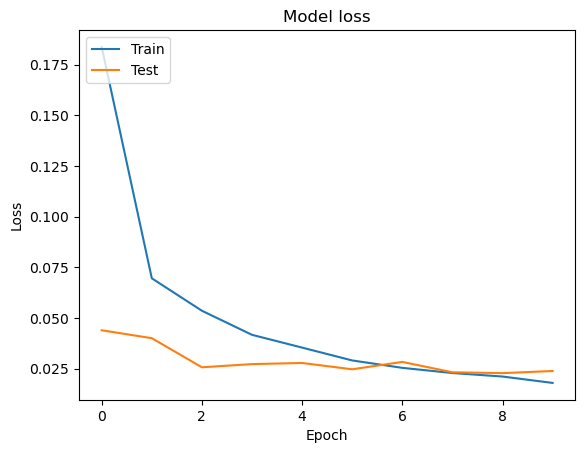

In [11]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()


### **Plot training & validation accuracy values**

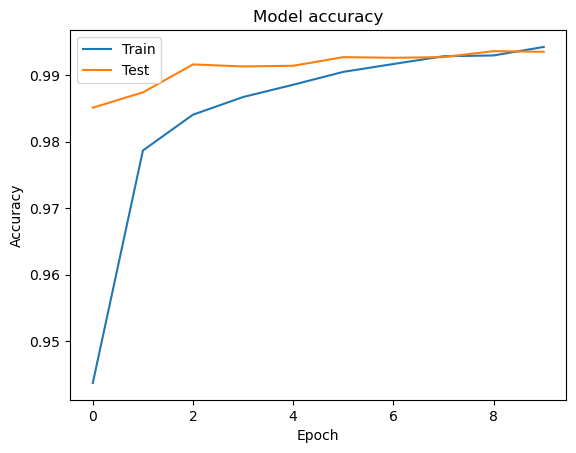

In [12]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()


### **Predict on test data**

In [13]:
predictions = model.predict(x_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step


### **Visualize actual and predicted image side by side**

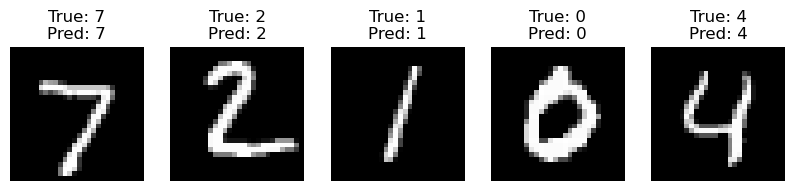

In [14]:
def plot_images(images, true_labels, pred_labels):
    plt.figure(figsize=(10, 5))
    for i in range(5):
        plt.subplot(1, 5, i+1)
        plt.imshow(images[i].reshape(28, 28), cmap='gray')
        plt.title(f"True: {true_labels[i]}\nPred: {np.argmax(pred_labels[i])}")
        plt.axis('off')
    plt.show()

plot_images(x_test[:5], y_test[:5], predictions[:5])

<div style="text-align: center; 
            background-color: #ffcc00; /* Bright Yellow */
            padding: 20px; 
            border-radius: 30px; 
            position: relative; 
            overflow: hidden;">
    <h2 style="color: #003366; /* Dark Blue */
               font-weight: bold; 
               margin: 0;">Step 6: Save the CNN model</h2>
    <div style="position: absolute; 
                width: 100%; 
                height: 100%; 
                top: -10%; 
                left: -10%; 
                background-color: #ffcc00; 
                clip-path: polygon(0 0, 0 100%, 100% 100%, 100% 0, 50% 50%); 
                z-index: -1;"></div>
</div>

In [19]:
model.save('mnist_cnn_model.h5')

------------------
-------------
-----

<div style="text-align: center; 
            background-color: #d43f3f; /* Bright Yellow */
            padding: 20px; 
            border-radius: 30px; 
            position: relative; 
            overflow: hidden;">
    <h2 style="color: #003366; /* Dark Blue */
               font-weight: bold; 
               margin: 0;">The End</h2>
    <div style="position: absolute; 
                width: 100%; 
                height: 100%; 
                top: -10%; 
                left: -10%; 
                background-color: #ffcc00; 
                clip-path: polygon(0 0, 0 100%, 100% 100%, 100% 0, 50% 50%); 
                z-index: -1;"></div>
</div>


---
-----
----
---